This report presents an analysis of various datasets using R. The tasks include loading and preprocessing data, performing statistical calculations, visualizing distributions, and applying data manipulation techniques.

In [2]:
install.packages("tidyverse")  # Install if you haven't already
install.packages("ggplot2")    # Install ggplot2 for visualization


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)     # For data manipulation
library(tidyr)     # For missing value handling


Read "Su_raw_matrix.txt" into a DataFrame

In [5]:
su <- read.delim("/content/Su_raw_matrix.txt", header = TRUE, sep = "\t")  # Ensure correct separator


In [6]:
mean_Liver2 <- mean(su$Liver_2.CEL, na.rm = TRUE)
sd_Liver2 <- sd(su$Liver_2.CEL, na.rm = TRUE)
print(mean_Liver2)
print(sd_Liver2)


[1] 241.8246
[1] 1133.352


(a) Find Mean and Standard Deviation of "Liver_2.CEL" Column

In [7]:
mean_Liver2 <- mean(su$Liver_2.CEL, na.rm = TRUE)
sd_Liver2 <- sd(su$Liver_2.CEL, na.rm = TRUE)
print(mean_Liver2)
print(sd_Liver2)


[1] 241.8246
[1] 1133.352


(b) Compute Column-Wise Mean and Sum

In [8]:
col_means <- colMeans(su, na.rm = TRUE)
col_sums <- colSums(su, na.rm = TRUE)
print(col_means)
print(col_sums)


      Brain_1.CEL       Brain_2.CEL Fetal_brain_1.CEL Fetal_brain_2.CEL 
         204.9763          315.0924          198.3439          267.6551 
Fetal_liver_1.CEL Fetal_liver_2.CEL       Liver_1.CEL       Liver_2.CEL 
         209.8722          399.1482          160.8558          241.8246 
      Brain_1.CEL       Brain_2.CEL Fetal_brain_1.CEL Fetal_brain_2.CEL 
          2588031           3978357           2504290           3379413 
Fetal_liver_1.CEL Fetal_liver_2.CEL       Liver_1.CEL       Liver_2.CEL 
          2649846           5039645           2030966           3053278 


 Generate Random Data & Plot Histograms
Generate 10,000 random numbers for each (mean, sigma) pair:

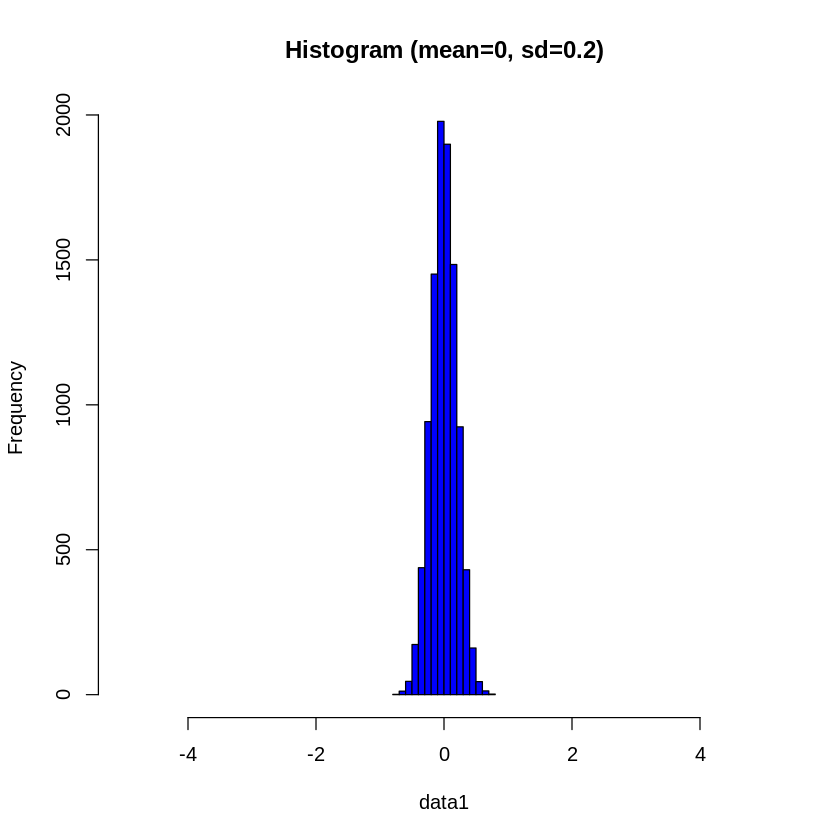

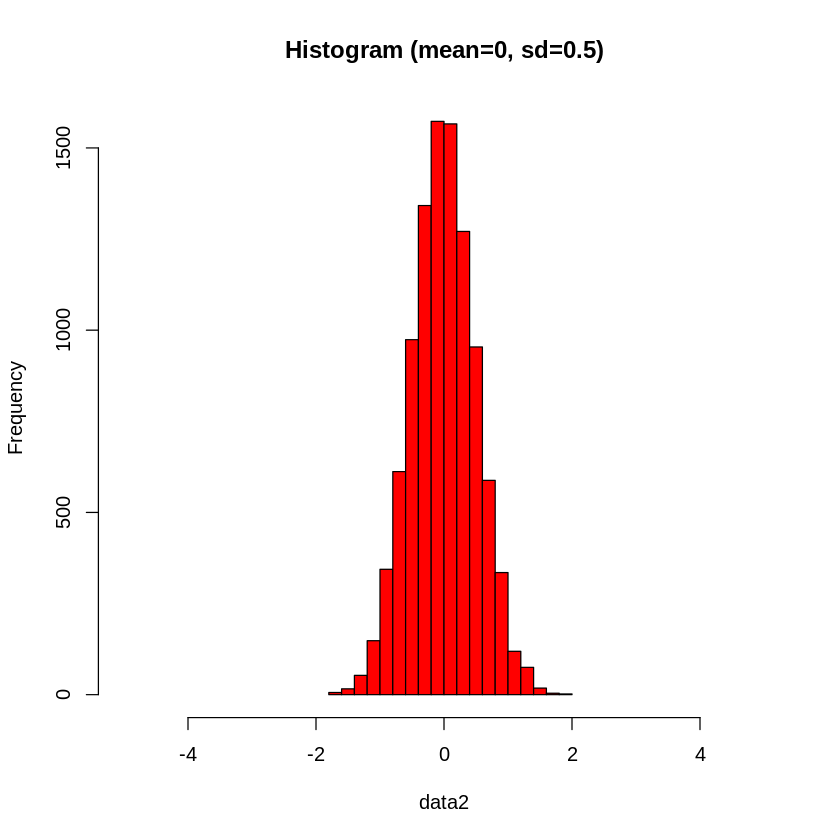

In [9]:
set.seed(123)  # For reproducibility

# Generate random numbers
data1 <- rnorm(10000, mean = 0, sd = 0.2)
data2 <- rnorm(10000, mean = 0, sd = 0.5)

# Plot histograms
hist(data1, main = "Histogram (mean=0, sd=0.2)", xlim = c(-5, 5), col = "blue")
hist(data2, main = "Histogram (mean=0, sd=0.5)", xlim = c(-5, 5), col = "red")


In [10]:
dev.copy(png, "histogram_sd0.2.png")
dev.off()
dev.copy(png, "histogram_sd0.5.png")
dev.off()


png 
  3

pdf 
  2

png 
  3

pdf 
  2

Create Sample Data & Plot Various Graphs

In [11]:
dat <- data.frame(
  cond = factor(rep(c("A", "B"), each = 200)),
  rating = c(rnorm(200), rnorm(200, mean = 0.8))
)


(a) Overlaid Histogram

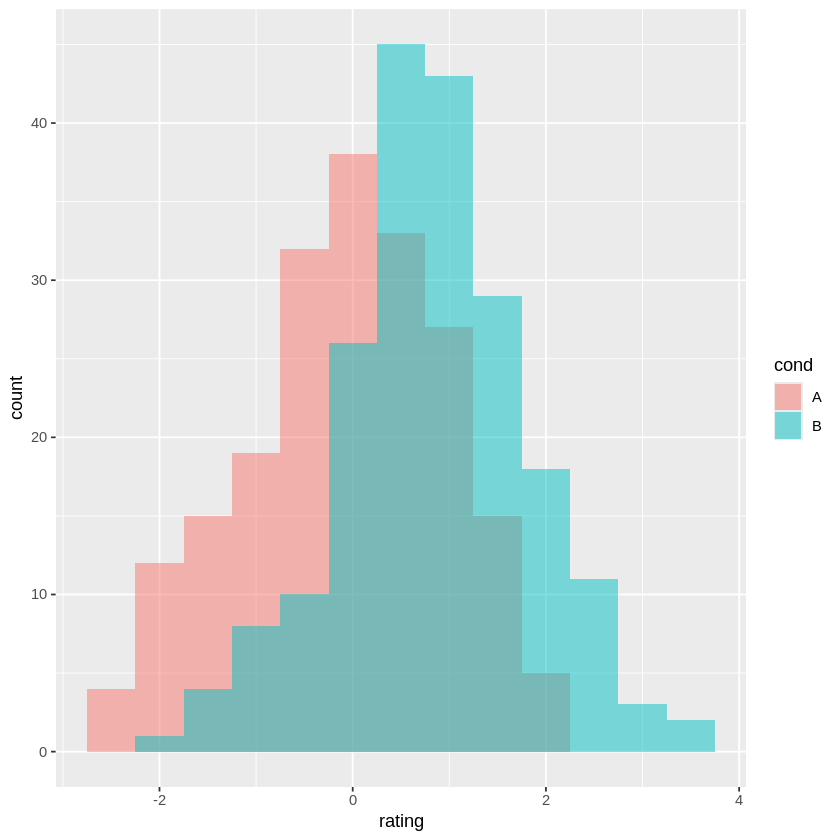

In [12]:
ggplot(dat, aes(x = rating, fill = cond)) +
  geom_histogram(binwidth = 0.5, alpha = 0.5, position = "identity")


(b) Interleaved Histogram

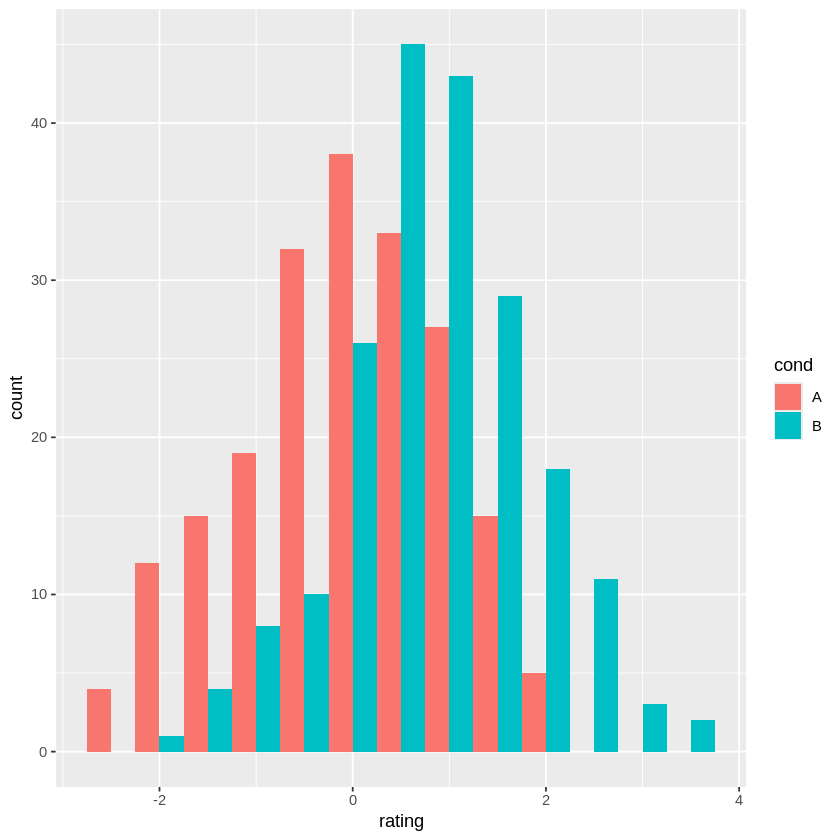

In [13]:
ggplot(dat, aes(x = rating, fill = cond)) +
  geom_histogram(binwidth = 0.5, position = "dodge")


(c) Density Plot

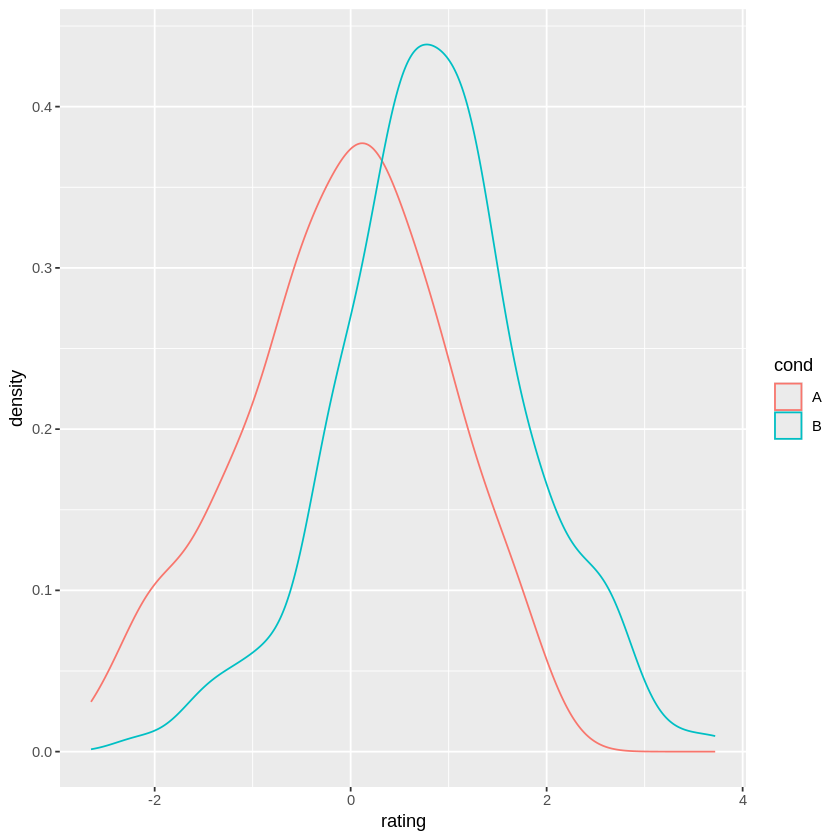

In [14]:
ggplot(dat, aes(x = rating, colour = cond)) +
  geom_density()


 Density Plot with Transparency

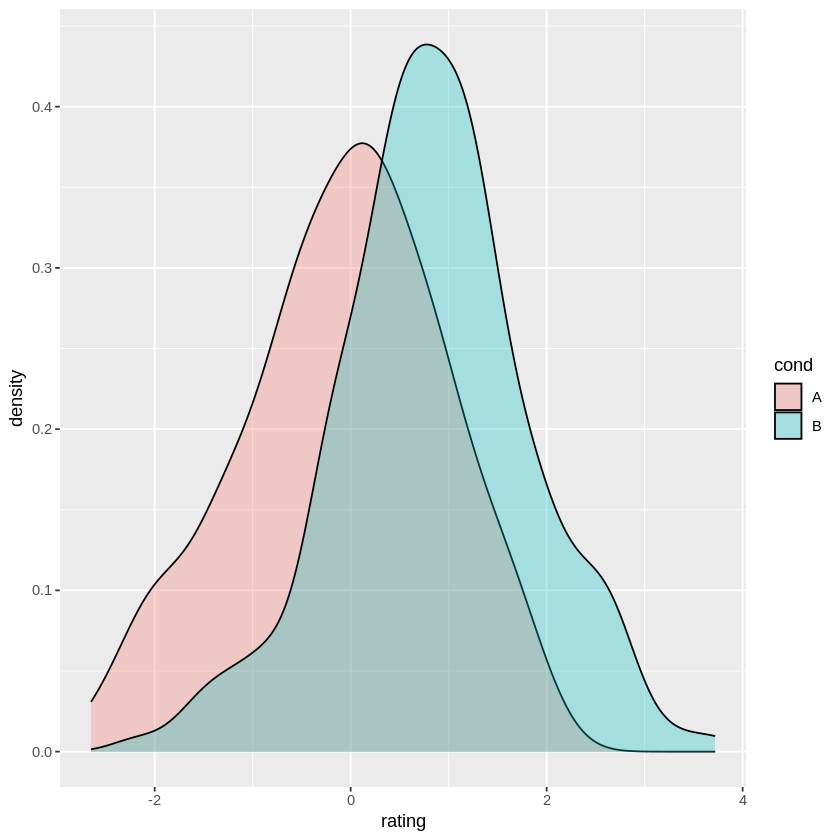

In [15]:
ggplot(dat, aes(x = rating, fill = cond)) +
  geom_density(alpha = 0.3)


Read "diabetes_train.csv" &

In [16]:
diabetes <- read.csv("/content/diabetes_train.csv")


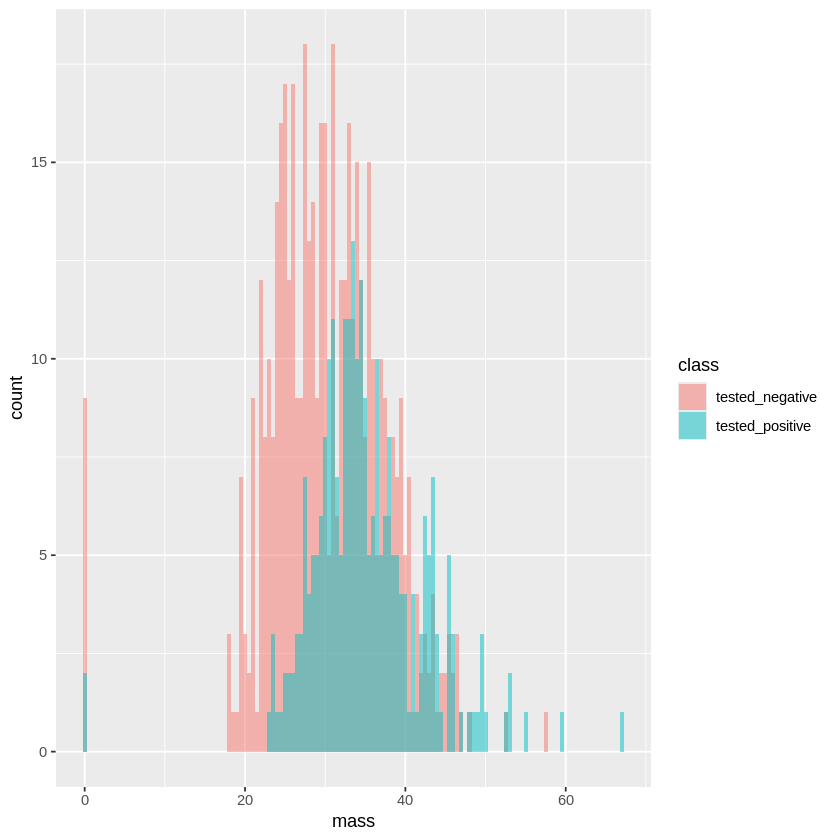

In [17]:
ggplot(diabetes, aes(x = mass, fill = class)) +
  geom_histogram(binwidth = 0.5, alpha = 0.5, position = "identity")


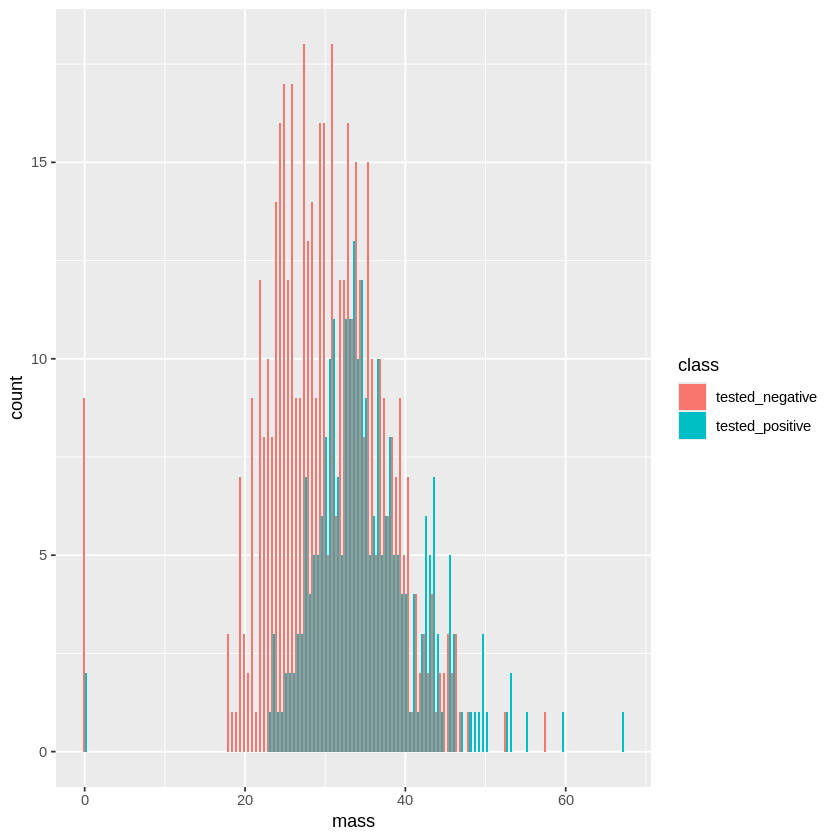

In [18]:
ggplot(diabetes, aes(x = mass, fill = class)) +
  geom_histogram(binwidth = 0.5, position = "dodge")


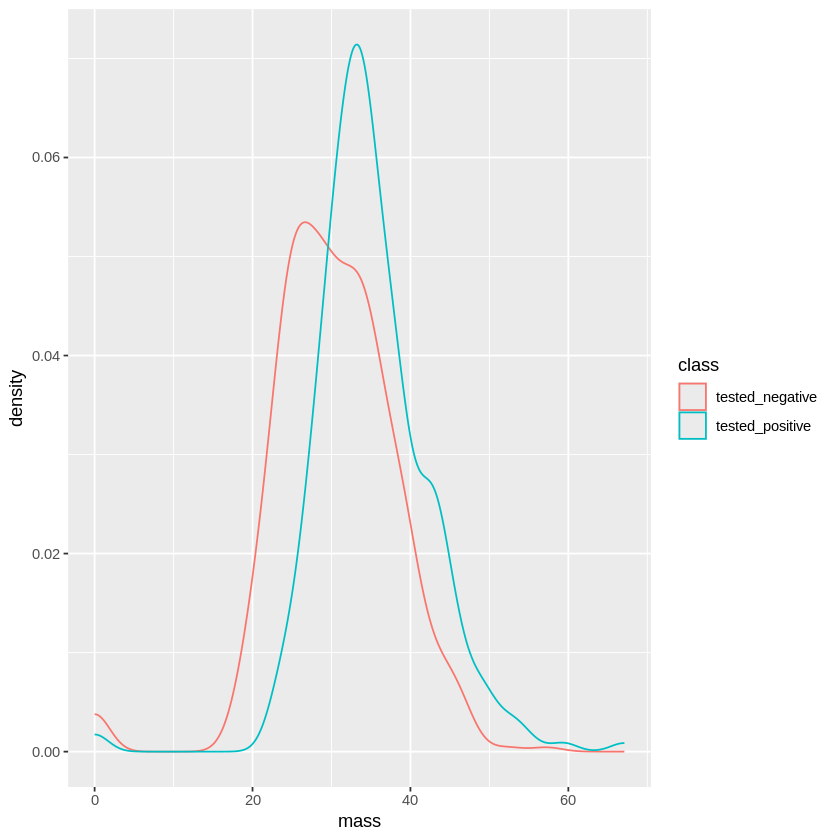

In [19]:
ggplot(diabetes, aes(x = mass, colour = class)) +
  geom_density()


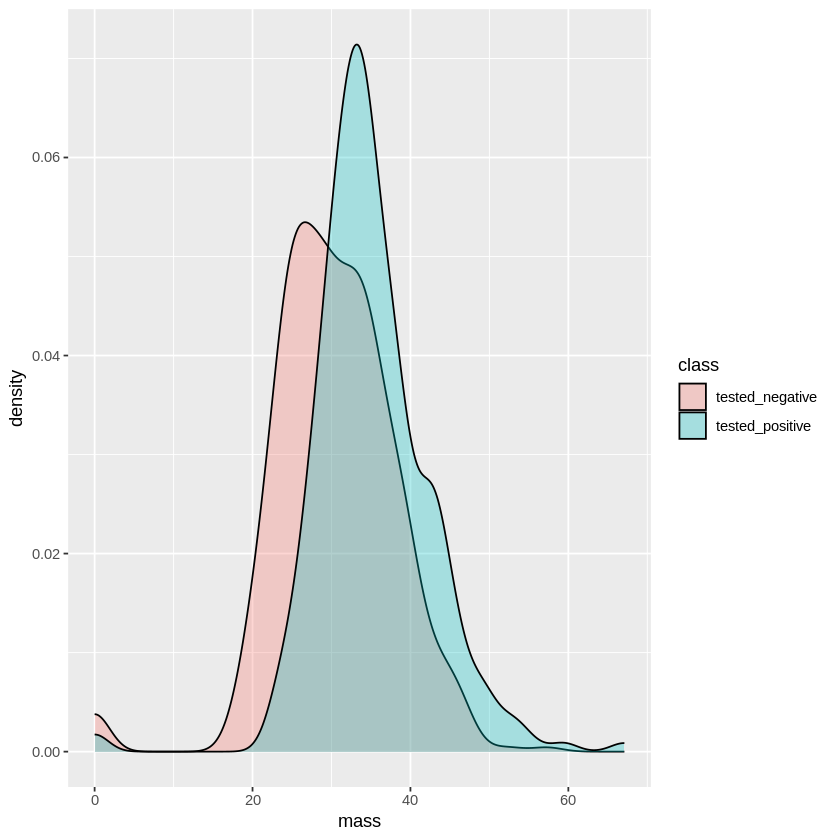

In [22]:
ggplot(diabetes, aes(x = mass, fill = class)) +
  geom_density(alpha = 0.3)


Process Titanic Dataset

In [23]:
passengers <- read.csv("/content/titanic.csv")


In [24]:
passengers %>% drop_na() %>% summary()


       X          PassengerId       Survived         Pclass         
 Min.   :  0.0   Min.   :  1.0   Min.   :0.0000   Length:714        
 1st Qu.:221.2   1st Qu.:222.2   1st Qu.:0.0000   Class :character  
 Median :444.0   Median :445.0   Median :0.0000   Mode  :character  
 Mean   :447.6   Mean   :448.6   Mean   :0.4062                     
 3rd Qu.:676.8   3rd Qu.:677.8   3rd Qu.:1.0000                     
 Max.   :890.0   Max.   :891.0   Max.   :1.0000                     
     Name               Sex                 Age            SibSp       
 Length:714         Length:714         Min.   : 0.42   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:20.12   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :28.00   Median :0.0000  
                                       Mean   :29.70   Mean   :0.5126  
                                       3rd Qu.:38.00   3rd Qu.:1.0000  
                                       Max.   :80.00   Max.   :5.0000  
     Parch   

In [25]:
male_passengers <- passengers %>% filter(Sex == "male")


In [26]:
passengers %>% arrange(desc(Fare))


X,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


Create New Column "FamSize"

In [27]:
passengers <- passengers %>% mutate(FamSize = Parch + SibSp)


In [28]:
passengers %>%
  group_by(Sex) %>%
  summarise(meanFare = mean(Fare, na.rm = TRUE), numSurv = sum(Survived, na.rm = TRUE))


Sex,meanFare,numSurv
<chr>,<dbl>,<int>
female,44.47982,233
male,25.52389,109


In [29]:
quantile(diabetes$skin, probs = c(0.10, 0.30, 0.50, 0.60), na.rm = TRUE)


10% 30% 50% 60% 
  0  10  23  27